## Projeto WPT (WIRELESS POWER TRANSFER WIRELESS POWER TRANSFER )

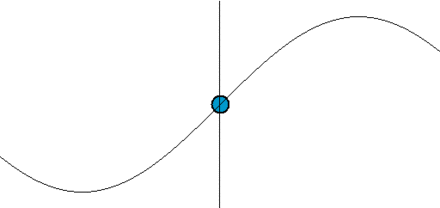

# <h1 style="color:purple"> Objetivo

O projeto WPT (WIRELESS POWER TRANSFER WIRELESS POWER TRANSFER ) consiste em um mecanismo de transmissão de energia sem fio por intermédio do eletromagnetismo e ondulatória.


In [2]:
#Importando Bibliotecas 
from cmath import *
from numpy import linalg
import matplotlib.pyplot as plt
import numpy as np

## <li style="color:purple"> Etapa 1
### Atividade 1

In [ ]:
[ inserir foto do do diagrama do modelo WPT  ]

[inserir demonstração de calculo da frequencia de ressonancia do conjunto LC]

Wressonancia = sqrt(LC)


### Atividade 2

Criando Funções de Operação 

In [ ]:
#função de Indutância mútua 
def M(L1, L2): 
    return sqrt(L1*L2)

#função de ressonância 
def Reso(L1, L2, C1, C2): 
    Reso1=1/(2*pi*sqrt(L1*C1))
    Reso2=1/(2*pi*sqrt(L2*C2))
    return Reso1, Reso2

#função

In [ ]:
#Definição de Dados

C1=0.1e-6
C2=0.1e-6
L1=196e-6
L2=196e-6
R1=0.5
R2=0.5
K=1
f=60 #frequencia
w=2*pi*f#calculando a frequencia angular 

XC1=1/(1j*w*C1) #Capacitância 1
XC2=1/(1j*w*C2) #Capacitância 2 
XL1=1j*w*L1 #Indutância 1
XL2=1J*w*L2 #Indutãncia 2 

#Apagar em breve 
print(M(L1,L2))
print(Reso(L1,L2,C1,C2))

In [ ]:
def CalcularTransformador(Uf, Rc, XC1, XC2, XL1, XL2):
    Zmodi=1/(1/XC2+1/Rcarga) #adição do C2 em paraleo na bobina 2 
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2-Zmodi]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

In [ ]:
'''#calculando C
C= 1/(((60*pi)**2)*3.40987e-6)

#Transformador com os dados do experimento
Trafo1 = Transformador()
Trafo1.R1=3.35
Trafo1.R2=3.35
Trafo1.L1=3.40987e-6
Trafo1.L2=3.40987e-6
Trafo1.C1= C
Trafo1.C2= C
Trafo1.k=1

print(Trafo1.M())
print(Trafo1.Ressonancia())
print(Trafo1.FatoresDeQualidade())'''

### Atividade 3